# Normal level

Рассмотрим логистическое отображение:

$$x_n = r x_{n-1} (1 - x_{n-1})$$

где $0 < x_0 < 1$ и $0 \leq r \leq 4$.

**Определение:** Неподвижная точка $x^*$ — это точка, которая переходит сама в себя под действием отображения, то есть удовлетворяет соотношению:

$$x^* = f(x^*)$$


## 1. Определение стационарных состояний

Стационарное состояние (неподвижная точка) характеризуется отсутствием изменений во времени: $x_{n+1} = x_n = x^*$.
Подставим это в уравнение отображения:

$$x^* = r x^* (1 - x^*)$$

Приведем уравнение к стандартному виду:
$$r (x^*)^2 + (1 - r) x^* = 0$$

Вынесем общий множитель:
$$x^* (r x^* + 1 - r) = 0$$

Корни уравнения:
1.  $x_1^* = 0$ (существует при любых $r$)
2.  $r x^* = r - 1 \implies x_2^* = 1 - \frac{1}{r}$

Исследуем второй корень. Чтобы $x_2^*$ был физически осмысленным в нашей задаче (лежал в $(0, 1)$), должны выполняться неравенства:
$$0 < 1 - \frac{1}{r} < 1$$

Правая часть ($1 - 1/r < 1$) дает $-1/r < 0 \implies r > 0$.
Левая часть ($1 - 1/r > 0$) дает $1 > 1/r \implies r > 1$.

**Итог:** Вторая точка существует внутри интервала только при $r > 1$.


## 2. Зависимость числа решений от параметра

Рассмотрим количество стационарных точек в зависимости от управляющего параметра $r$:

*   Если $0 \le r \le 1$, то выражение $1 - 1/r$ либо отрицательно, либо равно нулю (совпадает с первой точкой). В этом режиме система имеет **единственную** неподвижную точку $x^*=0$.
*   Если $1 < r \le 4$, то $1 - 1/r$ становится строго положительным и меньше единицы. Система обладает **двумя** различными неподвижными точками: нулем и положительным аттрактором $1 - 1/r$.


## 3. Верхняя оценка числа неподвижных точек

Поскольку функция отображения $f(x)$ является полиномом второй степени, уравнение $f(x) = x$ также сводится к квадратному уравнению $Ax^2 + Bx + C = 0$.

Из алгебры известно, что квадратное уравнение на поле действительных чисел не может иметь более двух корней. Следовательно, логистическое отображение ограничено **максимум двумя** неподвижными точками.


# Монотонное убывание последовательности при $r \in (0, 1]$

Рассмотрим логистическое отображение:

$$x_{n+1} = r x_n (1 - x_n)$$

где $x_0 \in (0, 1)$ и $r \in (0, 1]$.

**Утверждение:** Последовательность $\{x_n\}$ монотонно убывает.


## Исследование характера сходимости

Докажем монотонность убывания, рассмотрев отношение соседних членов последовательности.

Запишем отношение $x_{n+1}$ к $x_n$ (при $x_n \neq 0$):
$$\frac{x_{n+1}}{x_n} = \frac{r x_n (1 - x_n)}{x_n} = r (1 - x_n)$$

Оценим правую часть:
1.  Так как $x_n \in (0, 1)$, то величина $(1 - x_n)$ находится в интервале $(0, 1)$.
2.  По условию $r \in (0, 1]$.

Произведение числа $r \le 1$ на число $(1 - x_n) < 1$ строго меньше единицы:
$$r (1 - x_n) < 1$$

Следовательно:
$$\frac{x_{n+1}}{x_n} < 1 \implies x_{n+1} < x_n$$

Это доказывает, что каждый следующий элемент меньше предыдущего, то есть последовательность **монотонно убывает**. $\square$


## Существование предела

Мы имеем последовательность, которая:
1.  Убывает ($x_{n+1} < x_n$).
2.  Ограничена снизу нулем ($x_n > 0$).

В силу теоремы о пределе монотонной последовательности, она обязана сходиться к некоторому числу $L$. В данном случае, учитывая непрерывное снижение к нижней границе, пределом может быть только $0$ (единственная неподвижная точка в допустимой области при данных $r$).


### Покажем монотонность последовательности $\{x_n\}$ графически при разных значениях $r \in (0, 1]$

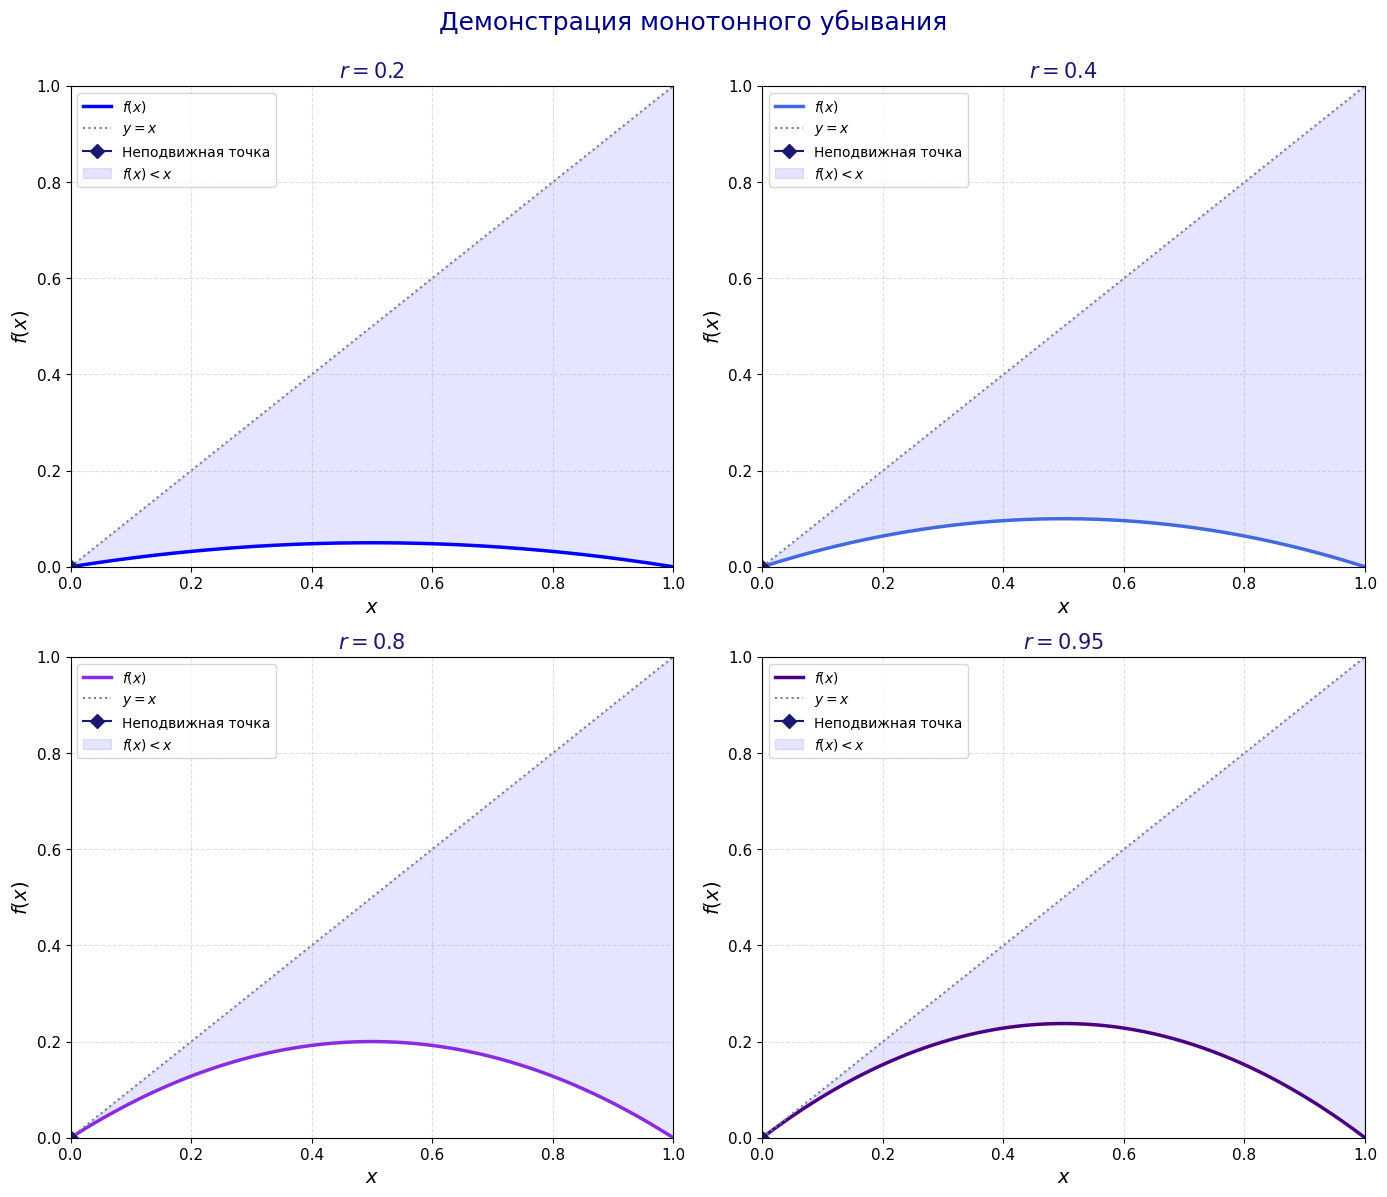

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data_x = np.linspace(0, 1, 1000)
rs = [0.2, 0.4, 0.8, 0.95]

# Сине-фиолетовая палитра
cols = ['#0000FF', '#4169E1', '#8A2BE2', '#4B0082']

plt.rcParams.update({'font.size': 11})

fig, ax_array = plt.subplots(2, 2, figsize=(14, 12))
flat_axes = ax_array.flatten()

for idx, r_param in enumerate(rs):
    cur_ax = flat_axes[idx]
    
    data_y = r_param * data_x * (1 - data_x)
    
    cur_ax.plot(data_x, data_y, color=cols[idx], linestyle='-', linewidth=2.5, label=f'$f(x)$')
    cur_ax.plot(data_x, data_x, color='#708090', linestyle=':', linewidth=1.5, label='$y = x$')
    cur_ax.plot(0, 0, marker='D', color='#191970', markersize=7, label='Неподвижная точка')
    
    # Заливка светло-голубым
    cur_ax.fill_between(data_x[1:], data_y[1:], data_x[1:], alpha=0.1, color='blue', label='$f(x) < x$')

    cur_ax.set_xlabel('$x$', fontsize=14)
    cur_ax.set_ylabel('$f(x)$', fontsize=14)
    cur_ax.set_title(f'$r = {r_param}$', fontsize=15, color='#191970')
    cur_ax.grid(True, linestyle='--', alpha=0.4)
    cur_ax.legend(loc='upper left', fontsize=10)
    cur_ax.set_xlim(0, 1)
    cur_ax.set_ylim(0, max(1, r_param/4 * 1.1))

plt.suptitle('Демонстрация монотонного убывания', fontsize=18, y=0.995, color='#000080')
plt.tight_layout()
plt.show()

### Покажем сходимость последовательности $\{x_n\}$ графически при разных значениях $r \in (0, 1]$ и $x_0 \in (0, 1)$

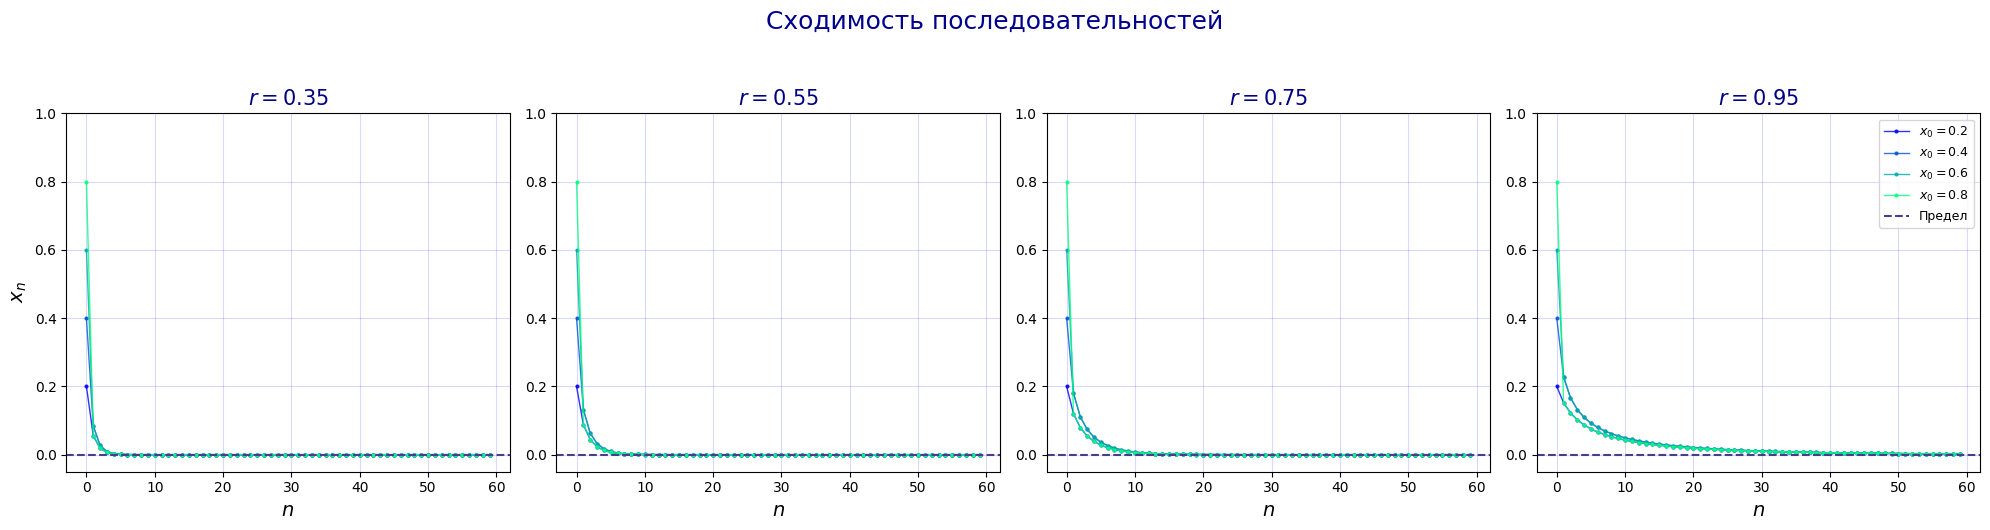

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_trajectory(start_val, param, steps):
    traj = np.zeros(steps)
    traj[0] = start_val
    for k in range(1, steps):
        prev = traj[k-1]
        traj[k] = param * prev * (1 - prev)
    return traj

r_set = [0.35, 0.55, 0.75, 0.95]
starts = [0.2, 0.4, 0.6, 0.8]
steps_count = 60
time_steps = np.arange(steps_count)

plt.rcParams.update({'font.size': 10})

fig, ax_list = plt.subplots(1, 4, figsize=(20, 5))
ax_list = ax_list.flatten()

# Градиент от синего к фиолетовому
line_colors = plt.cm.winter(np.linspace(0, 1, len(starts)))

for i, val_r in enumerate(r_set):
    curr_ax = ax_list[i]

    for j, val_x0 in enumerate(starts):
        vals = generate_trajectory(val_x0, val_r, steps_count)
        curr_ax.plot(time_steps, vals, marker='.', markersize=4, linewidth=1, 
               label=f'$x_0 = {val_x0}$', color=line_colors[j], alpha=0.8)
    
    curr_ax.axhline(y=0, color='#483D8B', linestyle='--', linewidth=1.5, label='Предел')
    
    curr_ax.set_xlabel('$n$', fontsize=14)
    if i == 0:
        curr_ax.set_ylabel('$x_n$', fontsize=14)
    curr_ax.set_title(f'$r = {val_r}$', fontsize=15, color='#000080')
    curr_ax.grid(True, which='both', alpha=0.15, color='blue')
    
    if i == 3:
        curr_ax.legend(loc='upper right', fontsize=9)
    curr_ax.set_ylim(-0.05, 1.0)

plt.suptitle(r'Сходимость последовательностей', fontsize=18, y=1.05, color='#00008B')
plt.tight_layout()
plt.show()

# Монотонность подпоследовательностей логистического отображения при $r \in (2, 3)$

Рассмотрим логистическое отображение:

$$x_{n+1} = r x_n (1 - x_n)$$

где $r \in (2, 3)$ и $x_0 \in (0, 1)$.

Неподвижная точка: $x^* = 1 - \frac{1}{r}$.

Определим подпоследовательности:
$$\{x_{2n}\}, x_{2n} > x^*$$
$$\{x_{2n+1}\}, x_{2n+1} < x^*$$


## Динамика четной подпоследовательности $\{x_{2n}\}$

Рассмотрим ситуацию, когда текущий член $x_{2n}$ находится выше точки равновесия $x^*$.
Неравенство $x_{2n} > x^*$ эквивалентно $x_{2n} > 1 - 1/r$.

Преобразуем это неравенство:
$$x_{2n} > 1 - \frac{1}{r} \implies \frac{1}{r} > 1 - x_{2n} \implies 1 > r(1 - x_{2n})$$

Умножим обе части на положительное $x_{2n}$:
$$x_{2n} > r x_{2n} (1 - x_{2n}) = x_{2n+1}$$

Это означает, что следующий шаг отображения уменьшает значение аргумента. Можно показать, что для четных шагов (при композиции отображения $f(f(x))$) свойство притяжения к неподвижной точке сохраняется, и $x_{2(n+1)}$ будет ближе к $x^*$, оставаясь сверху (в локальной окрестности). Таким образом, четные итерации формируют нисходящую ветвь сходимости.


## Динамика нечетной подпоследовательности $\{x_{2n+1}\}$

Для случая $x_{2n+1} < x^*$ выполним обратные преобразования.
Из условия $x_{2n+1} < 1 - 1/r$ следует:
$$\frac{1}{r} < 1 - x_{2n+1} \implies 1 < r(1 - x_{2n+1})$$

Умножая на $x_{2n+1}$, получаем:
$$x_{2n+1} < r x_{2n+1} (1 - x_{2n+1}) = x_{2n+2}$$

Отображение "выталкивает" значение вверх. Нечетные члены последовательности образуют возрастающую ветвь, стремящуюся к $x^*$ снизу.

**Общий вывод:** Сходимость к неподвижной точке при $r \in (2, 3)$ носит осциллирующий (колебательный) характер, напоминая затухающую синусоиду.


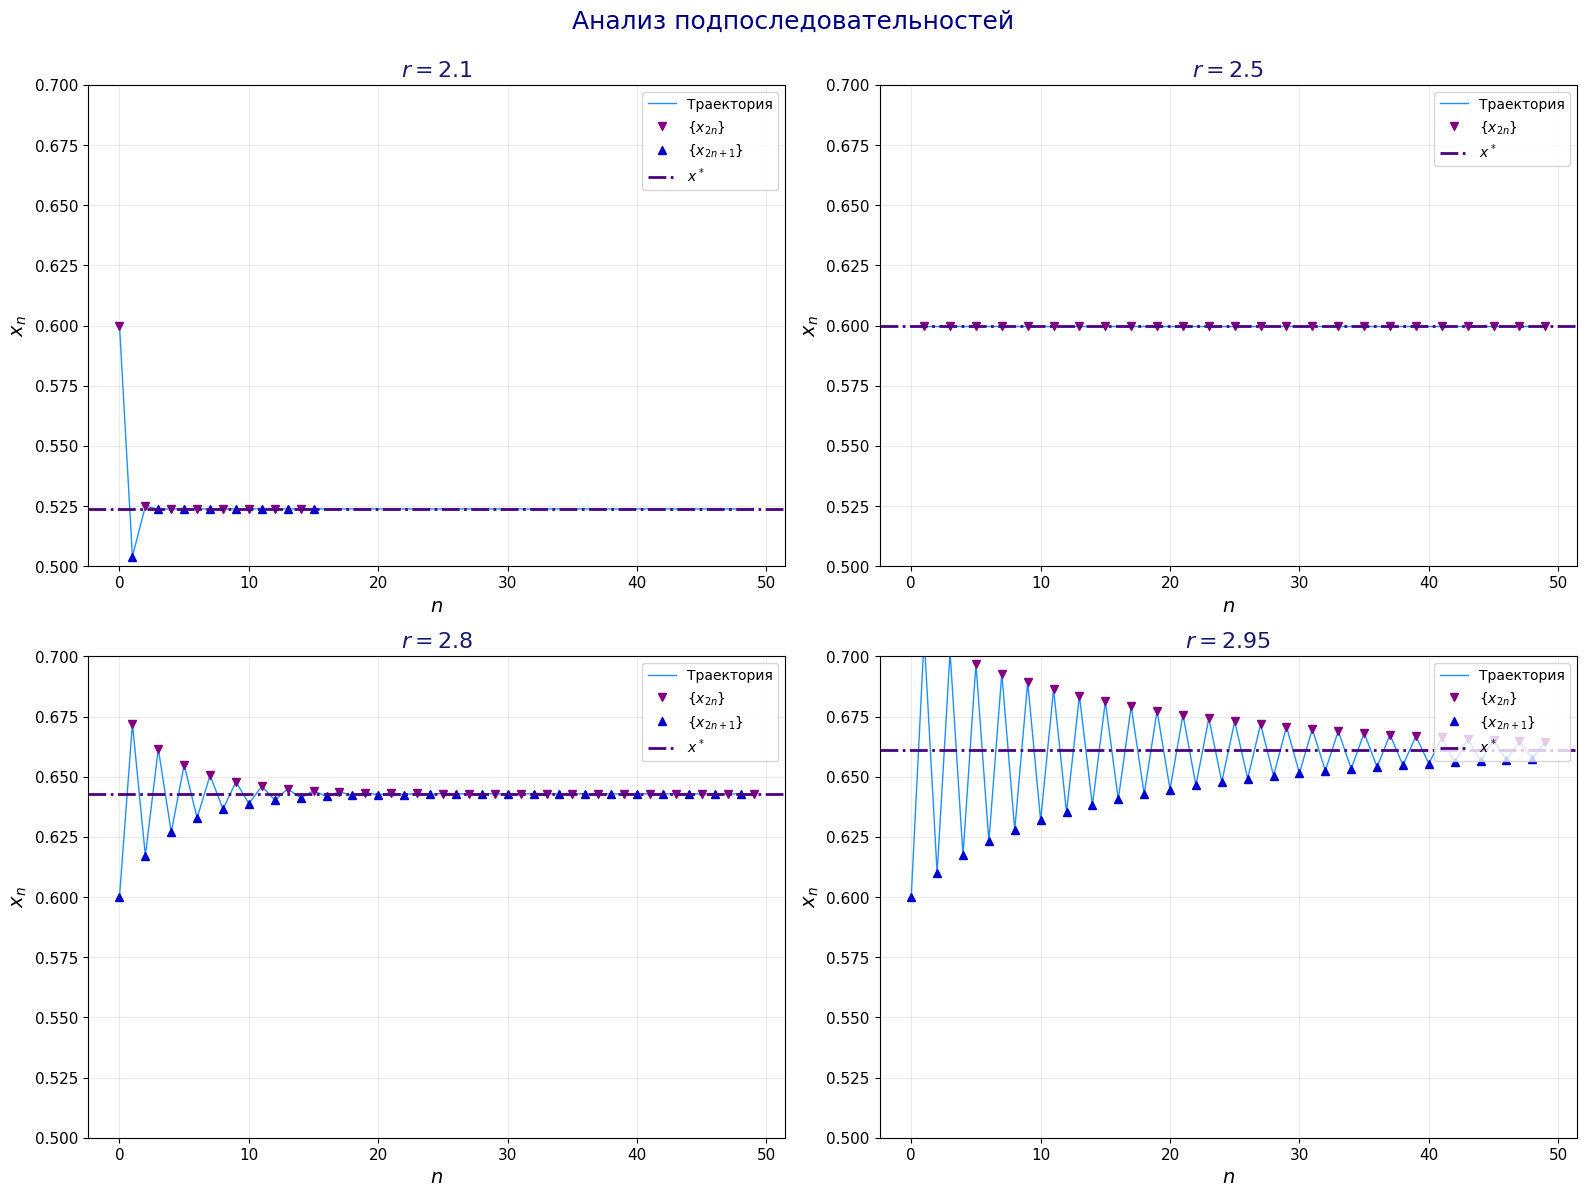

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def get_seq(x_start, r_par, n):
    res = [x_start]
    for _ in range(n - 1):
        curr = res[-1]
        res.append(r_par * curr * (1 - curr))
    return np.array(res)

rs_check = [2.1, 2.5, 2.8, 2.95]
init_x = 0.60
iters = 50
n_array = np.arange(iters)

fixed_pt = lambda r: 1 - 1/r

plt.rcParams.update({'font.size': 11})

fig, axes_grid = plt.subplots(2, 2, figsize=(16, 12))
axes_grid = axes_grid.flatten()

for idx, r_curr in enumerate(rs_check):
    ax_curr = axes_grid[idx]
    
    seq = get_seq(init_x, r_curr, iters)
    x_star_current = fixed_pt(r_curr)

    mask_upper = seq > x_star_current
    mask_lower = seq < x_star_current
    
    indices = np.arange(len(seq))

    ax_curr.plot(n_array, seq, color='#1E90FF', linestyle='-', linewidth=1, label='Траектория') # DodgerBlue
    
    if np.any(mask_upper):
        ax_curr.plot(indices[mask_upper], seq[mask_upper], 'v', color='#800080', markersize=6, 
               label='$\\{x_{2n}\\}$', linestyle='None') # Purple
    
    if np.any(mask_lower):
        ax_curr.plot(indices[mask_lower], seq[mask_lower], '^', color='#0000CD', markersize=6, 
               label='$\\{x_{2n+1}\\}$', linestyle='None') # MediumBlue
    
    ax_curr.axhline(y=x_star_current, color='#4B0082', linestyle='-.', linewidth=2, 
              label=f'$x^*$') # Indigo
    
    ax_curr.set_xlabel('$n$', fontsize=14)
    ax_curr.set_ylabel('$x_n$', fontsize=14)
    ax_curr.set_title(f'$r = {r_curr}$', fontsize=16, color='#191970')
    ax_curr.grid(True, alpha=0.25)
    ax_curr.legend(loc='upper right', fontsize=10)
    ax_curr.set_ylim(0.5, 0.7)

plt.suptitle('Анализ подпоследовательностей', fontsize=18, y=0.995, color='#000080')
plt.tight_layout()
plt.show()

# Анализ точечного отображения

Рассмотрим точечное отображение:

$$x_{n+1} = r x_n (1 - x_n)(2 + x_n) = g(x_n)$$

где $0 < x_0 < 1$ и $r \in \left[0, \frac{27}{2(7\sqrt{7}-10)}\right]$.


## 1. Аналитическое нахождение неподвижных точек

Неподвижная точка $x^*$ удовлетворяет условию:

$$x^* = g(x^*) = r x^* (1 - x^*)(2 + x^*)$$

Решим это уравнение:

$$x^* = r x^* (1 - x^*)(2 + x^*)$$

$$x^* = r x^* (2 + x^* - 2x^* - (x^*)^2)$$

$$x^* = r x^* (2 - x^* - (x^*)^2)$$

Перенесём все слагаемые в одну сторону:

$$x^* - r x^* (2 - x^* - (x^*)^2) = 0$$

$$x^* [1 - r(2 - x^* - (x^*)^2)] = 0$$

$$x^* [1 - 2r + r x^* + r (x^*)^2] = 0$$

Отсюда получаем:

**Решение 1:** $x^* = 0$

**Решение 2:**
$$r (x^*)^2 + r x^* + 1 - 2r = 0$$

Это квадратное уравнение относительно $x^*$. Решим его:

$$D = r^2 - 4r (1 - 2r) = r^2 - 4r + 8r^2 = 9r^2 - 4r$$
Для существования действительных корней $D \ge 0 \implies r(9r - 4) \ge 0$. Так как $r>0$, то $r \ge 4/9$.

$$x^* = \frac{-r \pm \sqrt{9r^2 - 4r}}{2r} = \frac{-1 \pm \sqrt{9 - 4/r}}{2}$$

**Итого, неподвижные точки:**
$$x_1^* = 0$$
$$x_{2,3}^* = \frac{-1 \pm \sqrt{9 - 4/r}}{2}, \quad r \ge \frac{4}{9}$$


## 2. Диапазон параметра r для монотонной сходимости к нулю

Для того чтобы последовательность $x_{n+1} = r x_n (1 - x_n)(2 + x_n)$ монотонно сходилась к нулю, необходимо выполнение двух условий:

1. **Монотонное убывание:** $x_{n+1} < x_n$ для всех $n$
2. **Ограниченность снизу** $\inf \{x_{n+1}\}$ = 0

### Условие монотонного убывания

Из условия $x_{n+1} < x_n$ при $x_n > 0$ получаем:

$$r x_n (1 - x_n)(2 + x_n) < x_n$$

$$r (1 - x_n)(2 + x_n) < 1$$

Раскроем скобки:

$$r (2 - x_n - x_n^2) < 1$$

Рассмотрим функцию $h(x) = 2 - x - x^2$ на интервале $(0, 1)$.

Производная: $h'(x) = -1 - 2x < 0$ для всех $x \in (0, 1)$.
Следовательно, функция $h(x)$ убывает на $(0, 1)$.

Максимум достигается в точке $x=0$ (или на левой границе):
$$h(0) = 2$$

Для того чтобы $r h(x) < 1$ ($\forall x \in (0, 1)$), необходимо и достаточно, чтобы $r \cdot h(0) \le 1$ (строгое неравенство для $x>0$ требует $r < 1/2$, или $2r \le 1$ для нестрогого):

$$2r < 1 \implies r < \frac{1}{2}$$

### Ограниченность снизу

Аналогично доказательству для варианта $N=4$, при $r < 1/2$ и $x_0 \in (0, 1)$ последовательность остается в интервале $(0, 1)$ и ограничена снизу нулём.

### Вывод

**Диапазон параметра $r$, при котором последовательность монотонно сходится к нулю:**

$$r \in \left(0, \frac{1}{2}\right)$$


## 3. Построим график зависимости $x_n$ от $n$ для нескольких различных значений параметра $r$

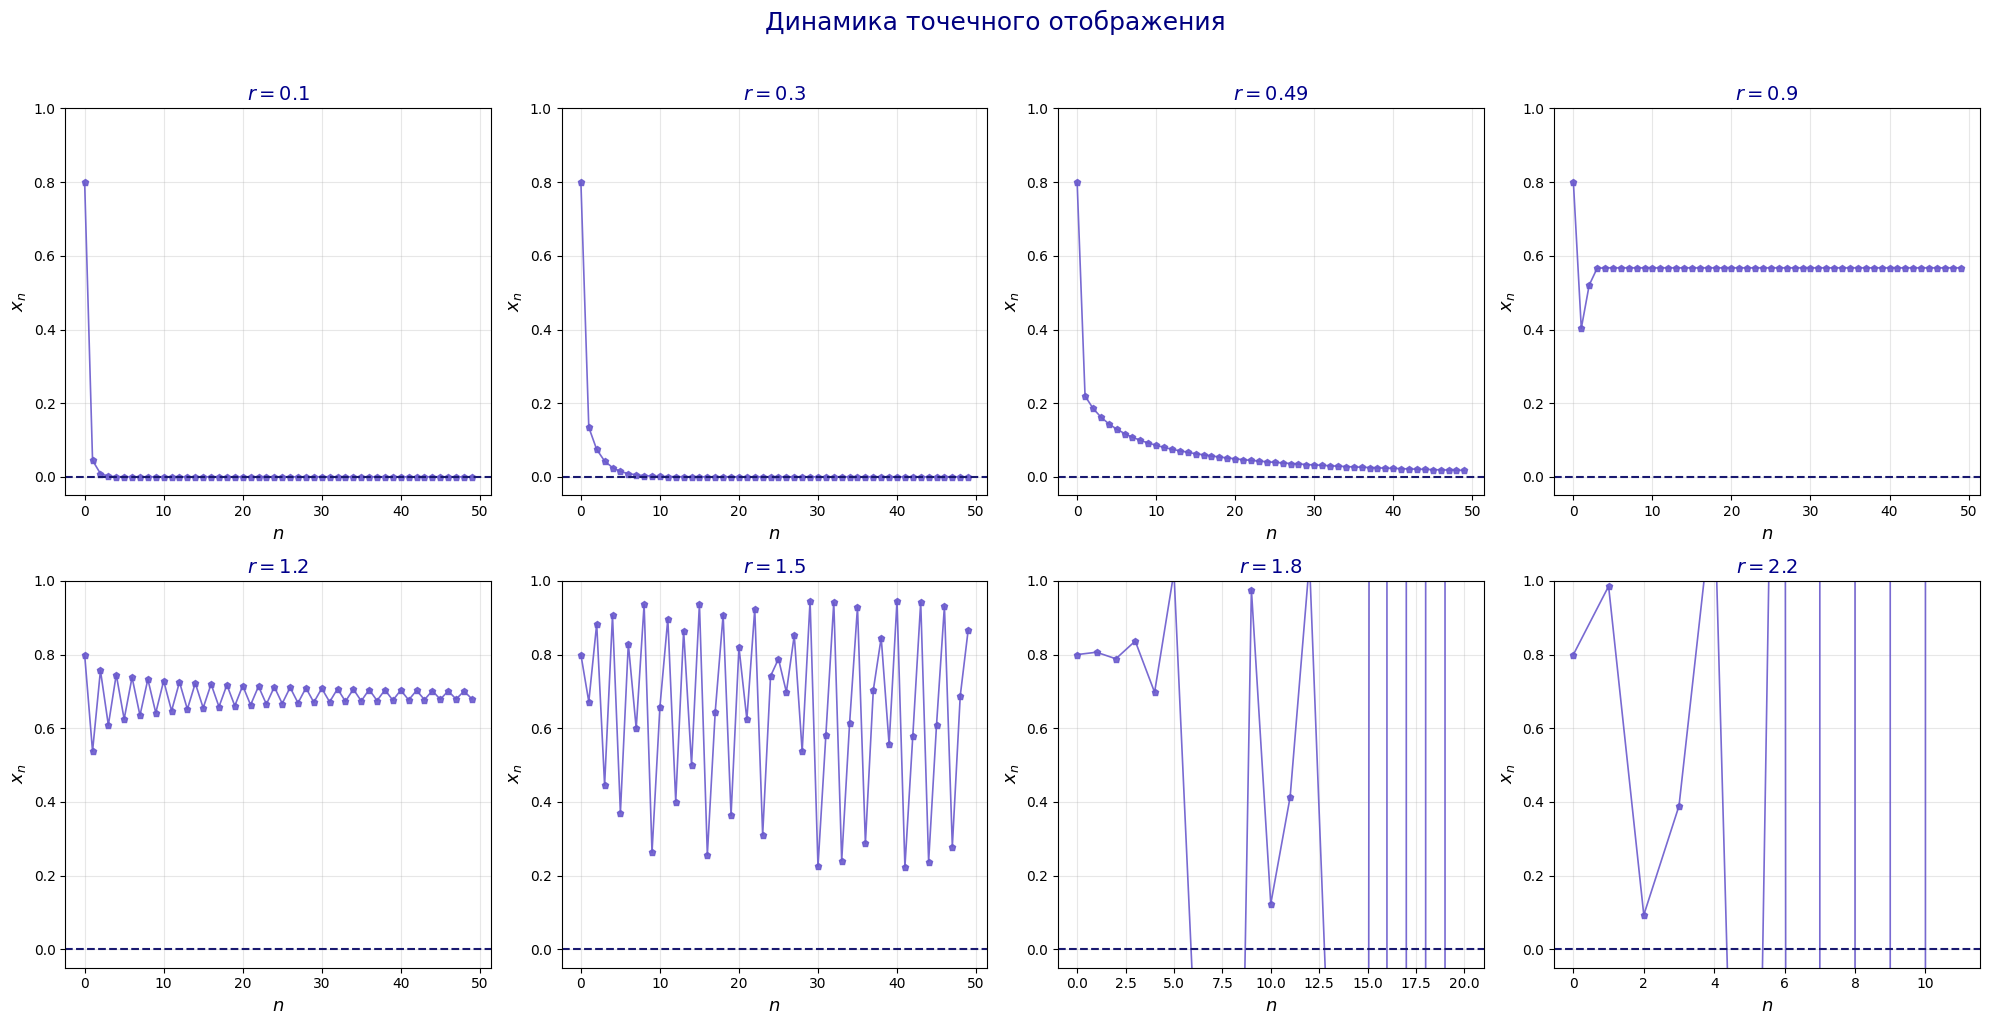

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def map_func(start, param, steps):
    trajectory = [start]
    for _ in range(steps - 1):
        val = trajectory[-1]
        next_val = param * val * (1 - val) * (2 + val)
        trajectory.append(next_val)
    return np.array(trajectory)

r_list = [0.1, 0.3, 0.49, 0.9, 1.2, 1.5, 1.8, 2.2]
x_init = 0.8
num_steps = 50
steps_arr = np.arange(num_steps)

plt.rcParams.update({'font.size': 10})

fig, plots = plt.subplots(2, 4, figsize=(20, 10))
plots = plots.flatten()

for i, r_val in enumerate(r_list):
    cur_plot = plots[i]
    
    values = map_func(x_init, r_val, num_steps)
    
    # SlateBlue color
    cur_plot.plot(steps_arr, values, marker='p', markersize=5, linewidth=1.2, 
           label=f'$x_n$', color='#6A5ACD', alpha=0.9)
    
    # MidnightBlue limit
    cur_plot.axhline(y=0, color='#191970', linestyle='--', linewidth=1.5, label='Предел')
    
    if abs(r_val - 0.5) < 0.01:
        # CornflowerBlue limit
        cur_plot.axhline(y=0, color='#6495ED', linestyle='-', linewidth=2.5, label='Граница')

    cur_plot.set_xlabel('$n$', fontsize=13)
    cur_plot.set_ylabel('$x_n$', fontsize=13)
    cur_plot.set_title(f'$r = {r_val}$', fontsize=14, color='#00008B')
    cur_plot.grid(True, alpha=0.3)
    cur_plot.set_ylim(-0.05, max(1, x_init * 1.1))

plt.suptitle('Динамика точечного отображения', fontsize=18, y=1.02, color='#000080')
plt.tight_layout()
plt.show()